# Infosys Springboard Python Data Analyst Predicitive Analytics Model

# [A] Iris Dataset Classification 

## Getting some Data

In [1]:
from sklearn import datasets

In [2]:
import pandas as pd
import numpy as np

In [3]:
iris = datasets.load_iris()
iris_features = iris.data
iris_target = iris.target

In [4]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Estimator Objects

### 1. Import the estimator(Model) 

In [8]:
from sklearn.neighbors import KNeighborsClassifier

### 2. Create an instance of the estimator

In [9]:
flower_classifier = KNeighborsClassifier(n_neighbors = 3)

### 3. Use the data to train the estimator

In [10]:
iris_features[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [11]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
flower_classifier.fit(X=iris_features, y=iris_target)

KNeighborsClassifier(n_neighbors=3)

### 4. Use the data to make predictions

In [15]:
new_flower_1 = np.array([[5.1, 3.0, 1.1, 0.5]])
new_flower_2 = np.array([[6.0, 2.9, 4.5, 1.1]])

In [16]:
flower_classifier.predict(new_flower_1)

array([0])

In [17]:
flower_classifier.predict(new_flower_2)

array([1])

# [B] Predicting Alcohol Consumption in teenagers

In [45]:
df = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv')
df.rename(columns = {'sex':'gender'}, inplace=True)
df['alcohol_index'] = (5*df['Dalc'] + 2*df['Walc'])/7

df['acl'] = df['alcohol_index'] <= 2
df['acl'] = df['acl'].map({True: 'Low', False: 'High'})

In [46]:
df = df.dropna(subset=['famsize'])

In [47]:
df.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,alcohol_index,acl
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,1.000000,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,1.000000,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,2.285714,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1.000000,Low
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,1.285714,Low


In [48]:
features = ['gender', 'famsize', 'age', 'studytime', 'famrel', 'goout', 'freetime', 'G3']
target = 'acl'

In [49]:
df['famsize'] = df['famsize'].fillna('LE3')

In [50]:
df['gender'] = df['gender'].map({'F' : 0, 'M' : 1}).astype(int)

df['famsize'] = df['famsize'].map({'LE3' : 0, 'GT3' : 1}).astype(int)

df['acl'] = df['acl'].map({'Low' : 0, 'High' : 1}).astype(int)

In [51]:
X = df[features].values
y = df[target].values

In [52]:
df['acl'].value_counts(normalize = True)

acl
0    0.736709
1    0.263291
Name: proportion, dtype: float64

### Logistic Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression 

In [54]:
student_classifier_logreg = LogisticRegression(C = 2)

In [56]:
student_classifier_logreg.fit(X,y)

LogisticRegression(C=2)

In [57]:
df['predictions_logreg'] = student_classifier_logreg.predict(X)

In [59]:
confusion_matrix = pd.crosstab(df['predictions_logreg'], df['acl'])
confusion_matrix

acl,0,1
predictions_logreg,,
0,269,68
1,22,36


In [61]:
accuracy = (confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1]) / df.shape[0]
print("Accuracy : {}".format(accuracy))

Accuracy : 0.7721518987341772


### RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier 

In [63]:
student_classifier_rf = RandomForestClassifier()

In [64]:
student_classifier_rf.fit(X,y)

RandomForestClassifier()

In [65]:
df['prediction_rf'] = student_classifier_rf.predict(X)

In [67]:
confusion_matrix_2 = pd.crosstab(df['prediction_rf'], df['acl'])
confusion_matrix_2

acl,0,1
prediction_rf,,
0,291,1
1,0,103


In [68]:
accuracy_2 = (confusion_matrix_2.iloc[0,0] + confusion_matrix_2.iloc[1,1]) / df.shape[0]
print("Accuracy Random Forest Classifier: {}".format(accuracy_2))

Accuracy Random Forest Classifier: 0.9974683544303797


In [69]:
new_student = np.array([[1,1,18,2,1,5,5,10]])
prediction = student_classifier_rf.predict(new_student)
print("The Model predicts that the student belongs to the: ")
if prediction == 1:
    print("High Alcohol Consumption Group")
else:
    print("High Alcohol Consumption Group")    

The Model predicts that the student belongs to the: 
High Alcohol Consumption Group


In [70]:
new_student = np.array([[0,1,18,2,1,5,5,16]])
prediction = student_classifier_rf.predict(new_student)
print("The Model predicts that the student belongs to the: ")
if prediction == 1:
    print("High Alcohol Consumption Group")
else:
    print("High Alcohol Consumption Group")    

The Model predicts that the student belongs to the: 
High Alcohol Consumption Group


# [C] House Price Prediction Regression Model

In [71]:
import matplotlib.pyplot as plt

In [73]:
df_1 = pd.read_csv('/kaggle/input/housing-prices-dataset/train.csv', index_col = 0)

In [74]:
df_1['Age'] = df_1['YrSold'] - df_1['YearBuilt']

##### Getting Neighbors with more than 30 observations

In [75]:
counts = df_1['Neighborhood'].value_counts()

In [76]:
more_than_30 = list(counts[counts>30].index)
df_1 = df_1.loc[df_1['Neighborhood'].isin(more_than_30)]

In [77]:
features = ['CentralAir', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 
            'BedroomAbvGr', 'Age']

target = 'SalePrice'

#### Transforming Neighborhoods and CentralAir to the one-hot encoded form

In [78]:
dummies_nb = pd.get_dummies(df_1['Neighborhood'], drop_first=True)
df_1 = pd.concat([df_1, dummies_nb], axis = 1)

In [79]:
df_1['CentralAir'] = df_1['CentralAir'].map({'N' : 0, 'Y' : 1}).astype(int)

In [80]:
features += list(dummies_nb.columns)

In [82]:
X = df_1[features].values
y = df_1[target].values
n = df_1.shape[0]

#### What is the simplest possible model? -> Average

In [83]:
y_mean = np.mean(y)
y_mean

180167.63358778626

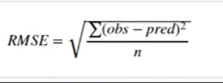

In [84]:
rmse_null_model = np.sqrt(np.sum((y - y_mean)**2)/n)
rmse_null_model

78032.94485454109

#### Building a Linear Regression Model

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
regressor = LinearRegression()

In [87]:
regressor.fit(X,y)

LinearRegression()

In [88]:
df_1['predictions'] = regressor.predict(X)

In [94]:
y_pred = df_1['predictions'].values

In [95]:
rmse_regressor = np.sqrt(np.sum((y - y_pred)**2) / n)
rmse_regressor

33729.218173366105

<Axes: xlabel='SalePrice', ylabel='predictions'>

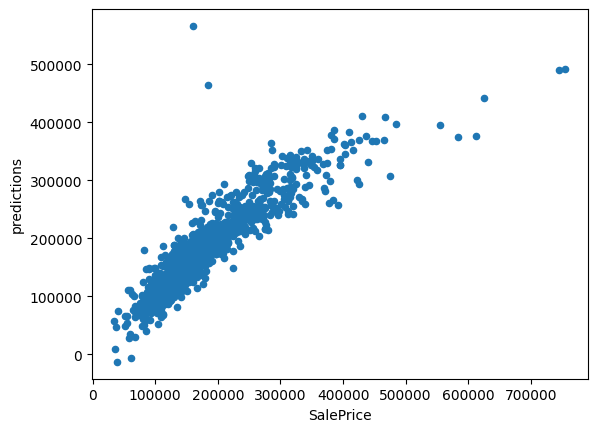

In [93]:
df_1.plot.scatter(x='SalePrice', y='predictions')

#### Making Prediction for a new house

In [96]:
new_house = np.array([[1,1200,6,6,1200,500,3,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]])
pred = regressor.predict(new_house)
print("For a house with the following characteristics:\n")
for feature, feature_value in zip(features, new_house[0]):
    if feature_value > 0:
        print("{} : {}".format(feature, feature_value))
print("\nThe Predicted value for the house is: {:,}".format(round(pred[0])))

For a house with the following characteristics:

CentralAir : 1
LotArea : 1200
OverallQual : 6
OverallCond : 6
1stFlrSF : 1200
2ndFlrSF : 500
BedroomAbvGr : 3
Age : 5
Edwards : 1

The Predicted value for the house is: 183,067


In [98]:
new_house = np.array([[0,1200,6,6,1200,500,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])
pred = regressor.predict(new_house)
print("For a house with the following characteristics:\n")
for feature, feature_value in zip(features, new_house[0]):
    if feature_value > 0:
        print("{} : {}".format(feature, feature_value))
print("\nThe Predicted value for the house is: {:,}".format(round(pred[0])))

For a house with the following characteristics:

LotArea : 1200
OverallQual : 6
OverallCond : 6
1stFlrSF : 1200
2ndFlrSF : 500
BedroomAbvGr : 3
Age : 5
Timber : 1

The Predicted value for the house is: 209,556
